## Importing the libraries

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#for model creation and evaluation
from sklearn.ensemble import GradientBoostingClassifier # for XGboost model
from sklearn.linear_model import LogisticRegression # for logistic regression model
from sklearn.svm import SVC # for SVM model
from sklearn.neighbors import KNeighborsClassifier # for KNN
from sklearn.naive_bayes import GaussianNB # for NB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import cross_val_score, GridSearchCV


# for plotting the data
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

## Loading the data

In [54]:
# Load the data
df_train = pd.read_csv("train.csv", header = 0)
df_test = pd.read_csv("test.csv", header = 0)

train_index = df["Survived"].isna() == False
test_index = df["Survived"].isna()

In [55]:
# View the first 10 entities
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## Cleaning the data

In [7]:
# Get some informations about the data (train and test data)
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [56]:
# drop unused columns
df.drop(["Name","Ticket","PassengerId"],axis = 1,inplace = True)
df_train.drop(["Name","Ticket","PassengerId"],axis = 1,inplace = True)
df_test.drop(["Name","Ticket","PassengerId"],axis = 1,inplace = True)
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [57]:
# Check NaN values in the dataset
df_train.isna().sum()
df_test.isna().sum()
df.isna().sum()

Survived     418
Pclass         0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [58]:
# Cabin column has two many NaN values, we don't need it for our Analysis so we will drop it 
df_train.drop("Cabin", inplace = True, axis = 1)
df_test.drop("Cabin", inplace = True, axis = 1)
df.drop("Cabin", inplace = True, axis = 1)

In [59]:
# Imputing values for the column Age
df_train["Age"].fillna(df["Age"].mean(), inplace = True)
df_test["Age"].fillna(df["Age"].mean(), inplace = True)
df["Age"].fillna(df["Age"].mean(), inplace = True)

# Imputing values for the column Embarked
df_train["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df_test["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace = True)

## Explorative Analysis of the Variables

When I checked the data dictionary on the competition page, I found the following column definitions:<br>
survival：Whether or not the passenger survived, 0 = No, 1 = Yes <br>
pclass：Passenger class, with higher passenger classes representing higher socioeconomic status, 1 = 1st, 2 = 2nd, 3 = 3rd <br>
sex：Gender <br>
Age：Age <br>
sibsp：Number of siblings/spouses onboard the Titanic <br>
parch：Number of parents/children onboard the Titanic <br> 
ticket：Ticket number <br>
fare：Ticket fare <br>
cabin：Room number <br>
embarked：Port of departure, C = Cherbourg, Q = Queenstown, S = Southampton <br>
Next, let's check the distribution of each variable.

In [12]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.735277,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002218,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.735277,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002218,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.881138,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0, 0.5, 'Frequency')

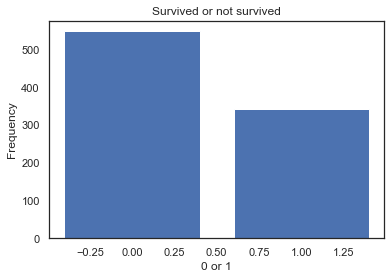

In [60]:
#Let's look at the distribution of the Output variable

# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data = df['Survived'].value_counts() 

# get x and y data 
points = data.index 
frequency = data.values 

# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Survived or not survived') 
ax.set_xlabel('0 or 1') 
ax.set_ylabel('Frequency')

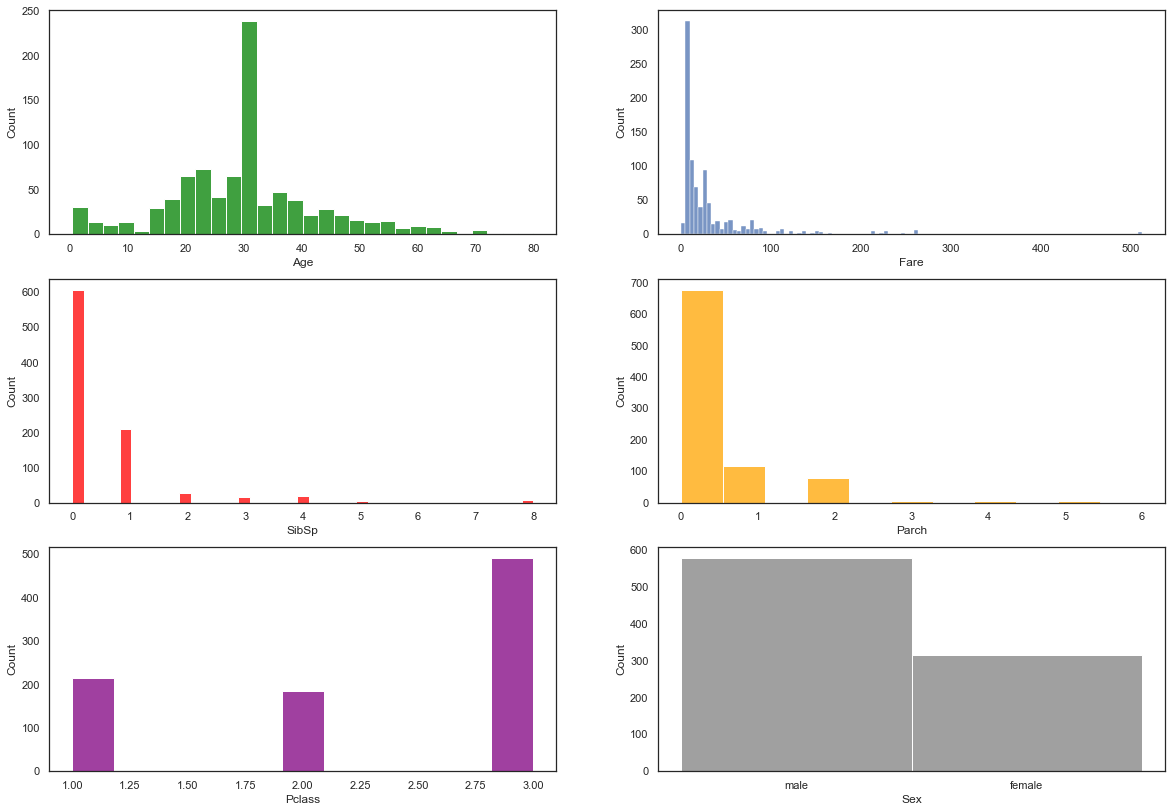

In [61]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
sns.set_theme()
sns.color_palette()

sns.histplot(df_train['Age'], ax=axes[0,0], color='green')
sns.histplot(df_train['Fare'], ax=axes[0,1])
sns.histplot(df_train['SibSp'], ax=axes[1,0], color='red')
sns.histplot(df_train['Parch'], ax=axes[1,1], color='orange')
sns.histplot(df_train['Pclass'], ax=axes[2,0], color='purple')
sns.histplot(df_train['Sex'], ax=axes[2,1], color='gray')

## Feature engineering

In [62]:
#OneHotEncoder

df["Pclass"] = df["Pclass"].apply(str)
df_train["Pclass"] = df_train["Pclass"].apply(str)
df_test["Pclass"] = df_test["Pclass"].apply(str)
df = pd.concat([df.drop(["Sex","Embarked","Pclass"],axis = 1),pd.get_dummies(df[["Sex","Embarked","Pclass"]],drop_first= True)],axis = 1)
df_train = pd.concat([df_train.drop(["Sex","Embarked","Pclass"],axis = 1),pd.get_dummies(df_train[["Sex","Embarked","Pclass"]],drop_first= True)],axis = 1)
df_test = pd.concat([df_test.drop(["Sex","Embarked","Pclass"],axis = 1),pd.get_dummies(df_test[["Sex","Embarked","Pclass"]],drop_first= True)],axis = 1)

In [25]:
df_train.head(10)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,1,0,1,0,1
1,1,38.000000,1,0,71.2833,0,0,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0,1
3,1,35.000000,1,0,53.1000,0,0,1,0,0
4,0,35.000000,0,0,8.0500,1,0,1,0,1
5,0,29.881138,0,0,8.4583,1,1,0,0,1
6,0,54.000000,0,0,51.8625,1,0,1,0,0
7,0,2.000000,3,1,21.0750,1,0,1,0,1
8,1,27.000000,0,2,11.1333,0,0,1,0,1
9,1,14.000000,1,0,30.0708,0,0,0,1,0


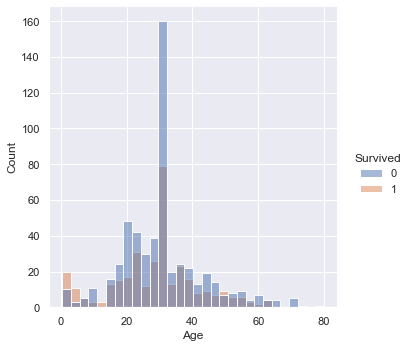

In [63]:
#We can imagine how passengers might be treated differently based on their age category. Children 
#would have been rescued first. Let's check this assumption using some plots.
sns.displot(data=df_train, x='Age', hue='Survived')

In [64]:
# Based on that observation, we will create a new categorical variable with 6 age categories.

label_names = ['Infant', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
cut_points =  [0, 5, 12, 18, 35, 60, 100]

df_train['Age_category'] = pd.cut(df_train['Age'], cut_points, labels=label_names)
df_test['Age_category'] = pd.cut(df_test['Age'], cut_points, labels=label_names)

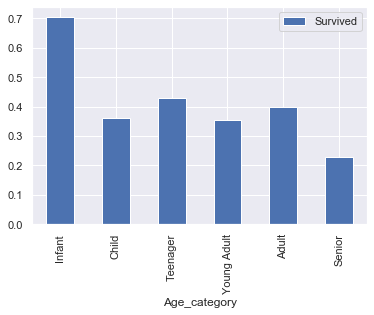

In [65]:
age_cats = df_train.pivot_table(index='Age_category', values='Survived')
age_cats.plot.bar()

In [66]:
df_train = pd.concat([df_train.drop(["Age_category"],axis = 1),pd.get_dummies(df_train[["Age_category"]],drop_first= True)],axis = 1)
df_test = pd.concat([df_test.drop(["Age_category"],axis = 1),pd.get_dummies(df_test[["Age_category"]],drop_first= True)],axis = 1)

In [67]:
#Drop the Age column
df_train.drop("Age", inplace = True, axis = 1)
df_test.drop("Age", inplace = True, axis = 1)
df_train.head()


,Survived,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior
0,0,1,0,7.2500,1,0,1,0,1,0,0,1,0,0
1,1,1,0,71.2833,0,0,0,0,0,0,0,0,1,0
2,1,0,0,7.9250,0,0,1,0,1,0,0,1,0,0
3,1,1,0,53.1000,0,0,1,0,0,0,0,1,0,0
4,0,0,0,8.0500,1,0,1,0,1,0,0,1,0,0


In [68]:
from sklearn.preprocessing import minmax_scale

for col in ['SibSp', 'Parch', 'Fare']:
    df_train[col + '_scaled'] = minmax_scale(df_train[col])
    df_test[col + '_scaled'] = minmax_scale(df_test[col])

## Training some baseline models

In [93]:
# gets model and data, returns model acc
def model_score(model,X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    return(accuracy_score(y_test,y_pred))

def cv_eval_model(X,y):
    xgb_model = GradientBoostingClassifier()
    lr_model = LogisticRegression(solver='liblinear')
    svm_model = SVC(kernel="linear")
    KNN_model = KNeighborsClassifier()
    NB_model = GaussianNB()
    for model in [xgb_model,lr_model,svm_model,KNN_model,NB_model]:
        print(f"{model} cv acc is : {cross_val_score(model,X,y,cv=10,scoring=make_scorer(accuracy_score)).mean()}")

X = df[train_index].drop(["Survived"],axis = 1)
y = df[train_index].Survived
test_data = df[test_index].drop(["Survived"],axis = 1)
cv_eval_model(X,y)

GradientBoostingClassifier() cv acc is : 0.828314606741573
LogisticRegression(solver='liblinear') cv acc is : 0.8002372034956305
SVC(kernel='linear') cv acc is : 0.786729088639201
KNeighborsClassifier() cv acc is : 0.6959300873907616
GaussianNB() cv acc is : 0.7856554307116105


We see above that the best fitted model ist the XGBoost classifier! Let's take a look at the 
coefficients of the logistic regressor 

In [36]:
df_train.head()

,Survived,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,SibSp_scaled,Parch_scaled,Fare_scaled
0,0,1,0,7.2500,1,0,1,0,1,0,0,1,0,0,0.125,0.0,0.014151
1,1,1,0,71.2833,0,0,0,0,0,0,0,0,1,0,0.125,0.0,0.139136
2,1,0,0,7.9250,0,0,1,0,1,0,0,1,0,0,0.000,0.0,0.015469
3,1,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,0.125,0.0,0.103644
4,0,0,0,8.0500,1,0,1,0,1,0,0,1,0,0,0.000,0.0,0.015713


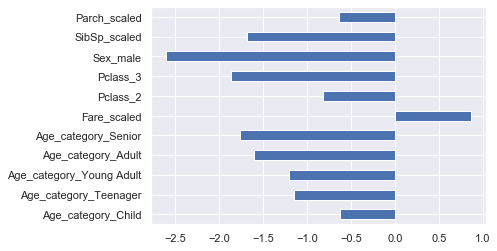

In [69]:
columns = [
       'Age_category_Child', 'Age_category_Teenager',
       'Age_category_Young Adult', 'Age_category_Adult',
       'Age_category_Senior', 'Fare_scaled', 'Pclass_2', 'Pclass_3',
        'Sex_male','SibSp_scaled', 'Parch_scaled']

lr = LogisticRegression()
lr.fit(df_train[columns], df_train['Survived'])
coefficients = lr.coef_
feature_importance = pd.Series(coefficients[0], index=columns)
feature_importance.plot.barh()

After looking at the coefficients, it seems that being male, the number of family members onboard, low passenger class, and being an adult are associated with not surviving, while being female, high passenger class, high ticket fare, and being a child are associated with survival.

Looking closely at the results, it seems that some phenomena are being explained by the same variable. SipSp and Parch seem to represent family size, and Fare_scaled and Pclass_1 seem to be explaining the socioeconomic status of the passenger.

Let's check the correlation of the variables to see if this is happening.

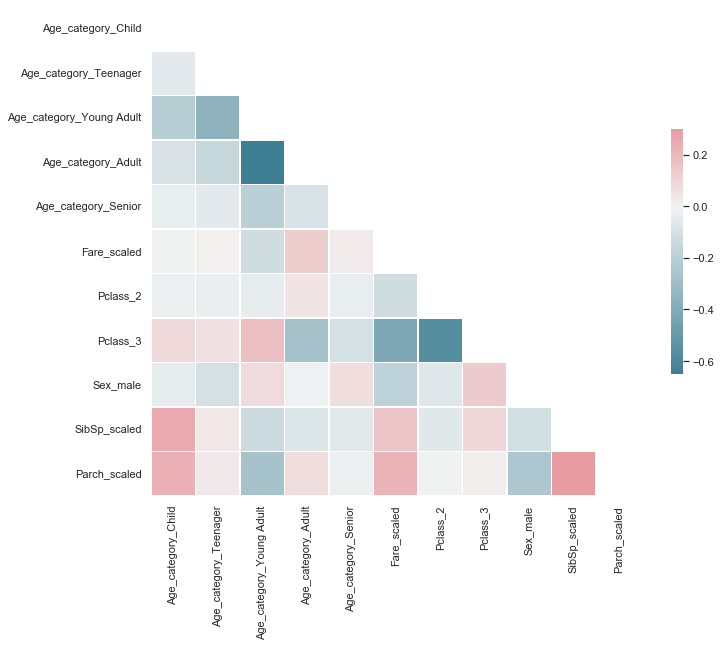

In [70]:
correlations = df_train[columns].corr()
sns.set(style='white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Let's add a variable to our data for passengers who were alone, and see how this affects our accuracy score.

In [71]:
def add_isalone(df):
    df['family_size'] = df[['SibSp', 'Parch']].sum(axis=1)
    df['isalone'] = 0
    df.loc[(df['family_size'] == 0), 'isalone'] = 1
    df = df.drop('family_size', axis=1)
    return df

df_train = add_isalone(df_train)
df_test = add_isalone(df_test)

In [72]:
df_train.head()

,Survived,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Age_category_Child,Age_category_Teenager,Age_category_Young Adult,Age_category_Adult,Age_category_Senior,SibSp_scaled,Parch_scaled,Fare_scaled,isalone
0,0,1,0,7.2500,1,0,1,0,1,0,0,1,0,0,0.125,0.0,0.014151,0
1,1,1,0,71.2833,0,0,0,0,0,0,0,0,1,0,0.125,0.0,0.139136,0
2,1,0,0,7.9250,0,0,1,0,1,0,0,1,0,0,0.000,0.0,0.015469,1
3,1,1,0,53.1000,0,0,1,0,0,0,0,1,0,0,0.125,0.0,0.103644,0
4,0,0,0,8.0500,1,0,1,0,1,0,0,1,0,0,0.000,0.0,0.015713,1


In [73]:
#Train an XGBoost Model
import xgboost as xgb

xgboost = xgb.XGBClassifier(random_state=1, verbosity=0, use_label_encoder=False)

scores = cross_val_score(xgboost, df_train[columns], df_train['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.819338327091136


In [74]:
columns.append('isalone')

scores = cross_val_score(xgboost, df_train[columns], df_train['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.8215605493133582


We were able to raise our model's score with the addition of isalone.

We can continue to manually add and remove variables, but this isn't very efficient. Scikit-learn's feature_selection module includes recursive feature elimination, a method that iteratively removes the variables with the least explanatory power until an optimal score is reached.

Let's apply this to our data and see if it improves our score.

In [77]:
from sklearn.feature_selection import RFECV

def select_features(df, clf):
    df = df.select_dtypes([np.number])
    all_x = df.drop([ 'Survived'], axis=1)
    all_y = df['Survived']
    
    selector = RFECV(clf, min_features_to_select=5, cv=10, scoring='accuracy')
    selector.fit(all_x, all_y)
    
    best_columns = list(all_x.columns[selector.support_])
    return best_columns

select_features(df_train, xgboost)

['SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_S',
 'Pclass_2',
 'Pclass_3',
 'Age_category_Child',
 'Age_category_Teenager',
 'Age_category_Young Adult',
 'Age_category_Adult',
 'Age_category_Senior',
 'isalone']

In [84]:
new_cols = ['SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Embarked_S',
 'Pclass_2',
 'Pclass_3',
 'Age_category_Child',
 'Age_category_Teenager',
 'Age_category_Young Adult',
 'Age_category_Adult',
 'Age_category_Senior',
 'isalone']

scores = cross_val_score(xgboost, df_train[new_cols], df_train['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.8227215980024969


Great! Our accuracy ist now better than the older model!

## Hyperparameter tuning
We will now try to improve the accuracy of our model using some tuning's techniques. <br>
The parameteres that we will be dealing with are: <br>
    1/ n_estimators: The number of Decision Trees to be used in our model <br>
    2/ learning_rate: A weighting factor for the corrections by new trees when added to the model <br>
    3/ max_depth: The maximum depth for each Decision Tree. <br> 
Also, to avoid overfitting our model to the training data, we will employ early stopping. Early stopping is a method that stops the training of the model when the accuracy score begins to drop in succession.

In [82]:
x_train, x_valid, y_train, y_valid = train_test_split(df_train[new_cols], 
                                                      df_train['Survived'], 
                                                      test_size=.20, 
                                                      random_state=1)

xgboost = xgb.XGBClassifier(random_state=1, 
                            n_estimators = 1000, 
                            learning_rate = .05,
                            max_depth = 4,
                            verbosity = 0, 
                            use_label_encoder = False)

xgboost.fit(x_train, y_train, 
            early_stopping_rounds = 5, 
            eval_metric = 'error', 
            eval_set = [[x_valid, y_valid]], verbose=0)

scores = cross_val_score(xgboost, df_train[new_cols], df_train['Survived'], cv=10, scoring='accuracy')
print(np.mean(scores))

0.8227215980024969


We will use Grid Search to find the best hyperparameters combination.

In [85]:
clf = xgb.XGBClassifier(random_state=1, verbosity=0, use_label_encoder=False)
hyperparameters = {
    'n_estimators': [1000],
    'learning_rate': [.25, .05, .1],
    'max_depth': [3, 4, 5, 10]
                   }

fit_params={'early_stopping_rounds':15, 
            'eval_metric': 'error', 
            'eval_set':[[x_valid, y_valid]]}

gs = GridSearchCV(clf, param_grid=hyperparameters, verbose=0, cv=10, scoring='accuracy')
gs.fit(x_train, y_train, **fit_params, verbose=0)

best_params = gs.best_params_
best_score = gs.best_score_

print(best_params) 
print(best_score)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
0.8174687010954618


In [86]:
xgboost = xgb.XGBClassifier(random_state=1, 
                            n_estimators = 1000, 
                            learning_rate = .25,
                            max_depth = 4,
                            verbosity = 0, 
                            use_label_encoder = False)

xgboost.fit(x_train, y_train, 
            early_stopping_rounds = 5, 
            eval_metric = 'error', 
            eval_set = [[x_valid, y_valid]], verbose=0)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

In [88]:
#make submission
df_test2 = pd.read_csv("test.csv", header = 0)
def save_submission(model, cols, filename='titanic_sub.csv'):
    test_data = df_test[cols]
    predictions = model.predict(test_data)
    p_ids = df_test2['PassengerId']
    submission_df = {"PassengerId": p_ids,
                    'Survived': predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    
save_submission(xgboost, new_cols)